In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.6
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.6_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.6_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	4871.4371

Best Fitness:	1173.9212
Solution:	100.0000
Diff:		1073.9212

[0:03:48][----------] 1.96% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2365.6974

Best Fitness:	751.9938
Solution:	100.0000
Diff:		651.9938

[0:07:24][----------] 3.92% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	5541.3521

Best Fitness:	1109.2319
Solution:	100.0000
Diff:		1009.2319

[0:11:04][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3630.0710

Best Fitness:	1354.1418
Solution:	100.0000
Diff:		1254.1418

[0:14:42][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2702.0480

Best Fitness:	792.3068
Solution:	100.0000
Diff:		692.3068

[0:18:20][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3266.5019

Best Fitness:	906.9590
Solution:	100.0000
Diff:		806.9590

[0:21:55][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2785.2286

Best Fitness:	914.7604
Solution:	100.0000
Diff:		814.7604

[0:25:34][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	4034.8372

Best Fitness:	1249.1186
Solution:	100.0000
Diff:		1149.1186

[0:28:58][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3025.1322

Best Fitness:	1077.6944
Solution:	100.0000
Diff:		977.6944

[0:32:09][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	5042.2595

Best Fitness:	1247.7712
Solution:	100.0000
Diff:		1147.7712

[0:35:22][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2073.8037

Best Fitness:	673.6878
Solution:	100.0000
Diff:		573.6878

[0:38:35][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1823.5636

Best Fitness:	470.7720
Solution:	100.0000
Diff:		370.7720

[0:41:46][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2853.9371

Best Fitness:	657.8174
Solution:	100.0000
Diff:		557.8174

[0:45:00][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	5274.0639

Best Fitness:	897.1480
Solution:	100.0000
Diff:		797.1480

[0:48:13][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2677.8770

Best Fitness:	818.7341
Solution:	100.0000
Diff:		718.7341

[0:51:30][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3493.1457

Best Fitness:	855.9246
Solution:	100.0000
Diff:		755.9246

[0:54:46][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3384.4858

Best Fitness:	400.8322
Solution:	100.0000
Diff:		300.8322

[0:57:49][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	6449.2858

Best Fitness:	2031.4978
Solution:	100.0000
Diff:		1931.4978

[1:00:40][####------] 35.29% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3608.8903

Best Fitness:	919.4629
Solution:	100.0000
Diff:		819.4629

[1:03:31][####------] 37.25% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	5267.9633

Best Fitness:	1314.7829
Solution:	100.0000
Diff:		1214.7829

[1:06:20][####------] 39.22% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3058.0292

Best Fitness:	1096.9264
Solution:	100.0000
Diff:		996.9264

[1:09:13][####------] 41.18% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	7967.2924

Best Fitness:	2135.5391
Solution:	100.0000
Diff:		2035.5391

[1:12:04][####------] 43.14% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2446.1635

Best Fitness:	633.0036
Solution:	100.0000
Diff:		533.0036

[1:14:53][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3629.2535

Best Fitness:	957.5173
Solution:	100.0000
Diff:		857.5173

[1:17:44][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1753.9283

Best Fitness:	500.1353
Solution:	100.0000
Diff:		400.1353

[1:20:33][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2120.8089

Best Fitness:	725.3924
Solution:	100.0000
Diff:		625.3924

[1:23:10][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	4556.4961

Best Fitness:	957.7821
Solution:	100.0000
Diff:		857.7821

[1:25:41][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2548.1385

Best Fitness:	807.8206
Solution:	100.0000
Diff:		707.8206

[1:28:17][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3716.8908

Best Fitness:	1347.8838
Solution:	100.0000
Diff:		1247.8838

[1:30:47][######----] 56.86% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	5792.8464

Best Fitness:	1677.2297
Solution:	100.0000
Diff:		1577.2297

[1:33:17][######----] 58.82% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2118.9288

Best Fitness:	664.0747
Solution:	100.0000
Diff:		564.0747

[1:35:48][######----] 60.78% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2614.6765

Best Fitness:	636.5531
Solution:	100.0000
Diff:		536.5531

[1:38:19][######----] 62.75% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1657.8200

Best Fitness:	465.8176
Solution:	100.0000
Diff:		365.8176

[1:40:52][######----] 64.71% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	4567.0055

Best Fitness:	1199.9786
Solution:	100.0000
Diff:		1099.9786

[1:43:22][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	4241.4748

Best Fitness:	825.5776
Solution:	100.0000
Diff:		725.5776

[1:45:36][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3878.7530

Best Fitness:	1059.3770
Solution:	100.0000
Diff:		959.3770

[1:47:48][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	4153.0939

Best Fitness:	1300.5947
Solution:	100.0000
Diff:		1200.5947

[1:50:02][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3204.8530

Best Fitness:	425.0261
Solution:	100.0000
Diff:		325.0261

[1:52:15][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1522.4199

Best Fitness:	439.5964
Solution:	100.0000
Diff:		339.5964

[1:54:28][########--] 76.47% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3531.7945

Best Fitness:	1208.7495
Solution:	100.0000
Diff:		1108.7495

[1:56:41][########--] 78.43% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3613.9947

Best Fitness:	714.6515
Solution:	100.0000
Diff:		614.6515

[1:58:52][########--] 80.39% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1663.6379

Best Fitness:	420.5892
Solution:	100.0000
Diff:		320.5892

[2:01:02][########--] 82.35% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	4476.2026

Best Fitness:	1026.0457
Solution:	100.0000
Diff:		926.0457

[2:03:03][########--] 84.31% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2317.1535

Best Fitness:	652.7626
Solution:	100.0000
Diff:		552.7626

[2:05:01][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2812.7385

Best Fitness:	609.6052
Solution:	100.0000
Diff:		509.6052

[2:07:01][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2028.6546

Best Fitness:	647.6647
Solution:	100.0000
Diff:		547.6647

[2:09:07][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	4400.9829

Best Fitness:	777.1341
Solution:	100.0000
Diff:		677.1341

[2:11:04][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	3270.6064

Best Fitness:	1586.4007
Solution:	100.0000
Diff:		1486.4007

[2:13:01][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1986.9665

Best Fitness:	458.1169
Solution:	100.0000
Diff:		358.1169

[2:15:01][##########] 96.08% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	2589.0002

Best Fitness:	786.9277
Solution:	100.0000
Diff:		686.9277

[2:17:07][##########] 98.04% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1979.9121

Best Fitness:	614.1093
Solution:	100.0000
Diff:		514.1093

[2:19:34][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:19:34

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
193,2001.392159,2365.049382,2912.307030,2111.367096,2829.100288,1204.727423,2364.499453,702.887898,3170.203688,3397.834962,...,2234.071468,2093.784286,4985.994673,1619.654265,2169.815345,2815.603838,2904.909412,2035.900034,1718.480126,50
194,2001.392159,2365.049382,1659.679278,2111.367096,2829.100288,1204.727423,2364.499453,702.887898,3170.203688,1769.959883,...,2234.071468,2093.784286,4985.994673,1619.654265,2169.815345,2815.603838,2904.909412,2035.900034,1718.480126,50
195,2001.392159,2365.049382,1659.679278,2111.367096,2640.115008,1204.727423,2303.876841,702.887898,3133.951672,1769.959883,...,2027.100030,2093.784286,4985.994673,1619.654265,1056.609196,2815.603838,2904.909412,2035.900034,1718.480126,50
196,2001.392159,2365.049382,1659.679278,2111.367096,2640.115008,1204.727423,2303.876841,702.887898,3133.951672,1769.959883,...,2027.100030,2093.784286,4985.994673,1619.654265,1056.609196,2815.603838,2904.909412,2035.900034,1718.480126,50
197,2001.392159,1406.011425,1659.679278,2111.367096,2640.115008,1204.727423,1361.851261,702.887898,2291.334456,1769.959883,...,2027.100030,1902.571451,4985.994673,1619.654265,1056.609196,2815.603838,2904.909412,2035.900034,1718.480126,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 1073.9211978135036

Best error for run 1: 651.993827195734

Best error for run 2: 1009.2318565447708

Best error for run 3: 1254.141818107767

Best error for run 4: 692.3068059788404

Best error for run 5: 806.958966361266

Best error for run 6: 814.7604158466746

Best error for run 7: 1149.1186408227375

Best error for run 8: 977.6943881594354

Best error for run 9: 1147.7711506689843

Best error for run 10: 573.6877791101346

Best error for run 11: 370.77201758627916

Best error for run 12: 557.8173938822794

Best error for run 13: 797.1480037990143

Best error for run 14: 718.7341204441906

Best error for run 15: 755.9246494510749

Best error for run 16: 300.8322450929006

Best error for run 17: 1931.4978452654648

Best error for run 18: 819.4628725162031

Best error for run 19: 1214.7829075855957

Best error for run 20: 996.9264356131866

Best error for run 21: 2035.5390962041702

Best error for run 22: 533.003555687879

Best error for run 23: 857.5172578511836

Best error for run 24: 400.1353322532555

Best error for run 25: 625.3924447238421

Best error for run 26: 857.7821182106542

Best error for run 27: 707.8205518035928

Best error for run 28: 1247.8837552986342

Best error for run 29: 1577.2297473069113

Best error for run 30: 564.074725550349

Best error for run 31: 536.5531231231943

Best error for run 32: 365.8175975444817

Best error for run 33: 1099.9785562326624

Best error for run 34: 725.5775615832279

Best error for run 35: 959.376956200304

Best error for run 36: 1200.594684771208

Best error for run 37: 325.0261224561316

Best error for run 38: 339.59636647862266

Best error for run 39: 1108.7494919764442

Best error for run 40: 614.6515041304224

Best error for run 41: 320.5892296533749

Best error for run 42: 926.0456691437612

Best error for run 43: 552.7625632701768

Best error for run 44: 509.6051830018305

Best error for run 45: 547.6647186947014

Best error for run 46: 677.1341278971863

Best error for run 47: 1486.400721973948

Best error for run 48: 358.1168649974085

Best error for run 49: 686.9276806047976

Best error for run 50: 514.1093393057796

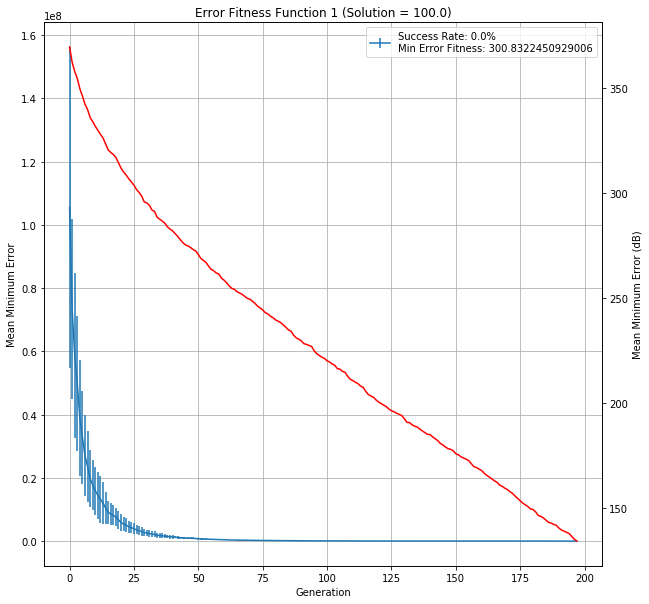

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.6_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.6,1073.921198,651.993827,1009.231857,1254.141818,692.306806,806.958966,...,509.605183,547.664719,677.134128,1486.400722,358.116865,686.927681,514.109339,821.120431,2:19:34,60000
